In [18]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, Normalizer
from sklearn.model_selection import GridSearchCV, KFold

In [19]:
df = pd.read_csv('data/train_engineered.csv')
df

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_Pickup_Time,Delivery_Distance (m),Ordered_month,Ordered_year,Ordered_time (mins)
0,37.0,4.9,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24,15.0,3025.149286,3,2022,690
1,34.0,4.5,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33,5.0,20183.529729,3,2022,1185
2,23.0,4.4,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26,15.0,1552.757802,3,2022,510
3,38.0,4.7,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21,10.0,7790.401360,4,2022,1080
4,32.0,4.6,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30,15.0,6210.137966,3,2022,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,30.0,4.8,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32,10.0,1489.845884,3,2022,695
41364,21.0,4.6,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36,15.0,11007.734764,2,2022,1195
41365,30.0,4.9,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16,15.0,4657.195394,3,2022,1430
41366,20.0,4.7,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26,5.0,6232.393050,3,2022,815


In [20]:
pd.get_dummies(df, drop_first=True)

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),Order_Pickup_Time,Delivery_Distance (m),Ordered_month,Ordered_year,Ordered_time (mins),...,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban
0,37.0,4.9,2.0,0.0,24,15.0,3025.149286,3,2022,690,...,0,0,0,0,1,1,0,0,0,1
1,34.0,4.5,2.0,1.0,33,5.0,20183.529729,3,2022,1185,...,0,0,0,0,1,0,1,0,0,0
2,23.0,4.4,0.0,1.0,26,15.0,1552.757802,3,2022,510,...,1,0,1,0,0,1,0,0,0,1
3,38.0,4.7,0.0,1.0,21,10.0,7790.401360,4,2022,1080,...,0,1,0,0,0,1,0,0,0,0
4,32.0,4.6,1.0,1.0,30,15.0,6210.137966,3,2022,810,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,30.0,4.8,1.0,0.0,32,10.0,1489.845884,3,2022,695,...,0,0,0,1,0,1,0,0,0,0
41364,21.0,4.6,0.0,1.0,36,15.0,11007.734764,2,2022,1195,...,0,0,0,0,0,1,0,0,0,0
41365,30.0,4.9,1.0,0.0,16,15.0,4657.195394,3,2022,1430,...,1,0,1,0,0,0,1,0,0,0
41366,20.0,4.7,0.0,1.0,26,5.0,6232.393050,3,2022,815,...,0,0,0,0,1,1,0,0,0,0


# Train/Valid/Test Split

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
X = df.drop('Time_taken(min)', axis=1)
Y = df['Time_taken(min)']

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size= 0.2)

# Linear Classifiers
- Linear
- Lasso
- Ridge

In [23]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Linear

In [24]:
linreg = make_pipeline(FunctionTransformer(pd.get_dummies, kw_args={'drop_first':True}), LinearRegression()).fit(xtrain, ytrain)

In [25]:
mean_squared_error(linreg.predict(xtest), ytest)

38.248990022050485

Text(0.5, 1.0, 'Linear Regression Actuals vs Predicted')

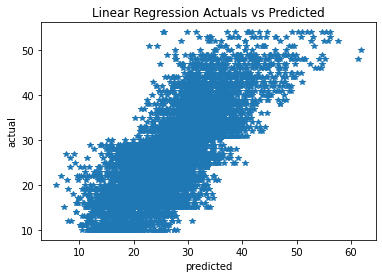

In [26]:
plt.plot(linreg.predict(xtest), ytest, '*')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear Regression Actuals vs Predicted')

## Ridge Regression

In [27]:
alpha = [0.00000000000001, 0.000000000001, 0.000001, 0.0000001]
ridgecv = make_pipeline(FunctionTransformer(pd.get_dummies, kw_args={'drop_first':True}), Normalizer(), RidgeCV(alphas=alpha, cv=5)).fit(xtrain,ytrain)

In [28]:
ridgecv[2].alpha_

1e-07

In [29]:
# get cross validation results for ridge regression
mean_squared_error(ridgecv.predict(xtest), ytest)

51.168403643557575

## Lasso Regression

In [30]:
alpha = [0.00000000000001, 0.000000000001, 0.000001, 0.0000001]
lassocv = make_pipeline(FunctionTransformer(pd.get_dummies, kw_args={'drop_first':True}), Normalizer(), LassoCV(alphas=alpha, cv=5)).fit(xtrain,ytrain)

/Users/ehniv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236094.05978396873, tolerance: 230.40560620963166
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ehniv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233.75589460646734, tolerance: 230.40560620963166
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ehniv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666123.1627096822, tolerance: 230.40560620963166
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ehniv/opt/anaconda3/lib/python3.9/site-package

In [31]:
lassocv[2].alpha_

1e-07

In [32]:
# get cross validation results for lasso regression
mean_squared_error(lassocv.predict(xtest), ytest)

51.19534933175822

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Grid Search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 320, stop = 380, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 5, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

rf_model = make_pipeline(FunctionTransformer(pd.get_dummies, kw_args={'drop_first':True}), RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)).fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [36]:
# hyperparameter tuning
rf_model['randomizedsearchcv'].best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 32,
 'bootstrap': True}

In [37]:
mean_squared_error(ytest, rf_model.predict(xtest))

14.790040790559011

### Feature Importance

In [38]:
start_time = time.time()
rf_model_tree = rf_model['randomizedsearchcv'].best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model['randomizedsearchcv'].best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.040 seconds


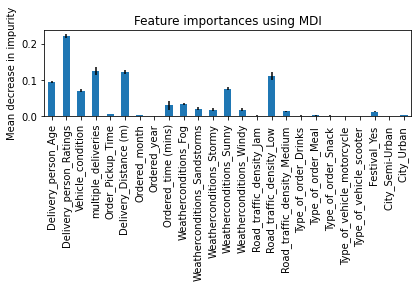

In [39]:
forest_importance = pd.Series(rf_model_tree, index=pd.get_dummies(xtrain, drop_first=True).columns.values)

fig, ax = plt.subplots()
forest_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From this we can see that the ordered year, type of order, type of vehicle, city are not important features. This was removed and another dataset was created

# KNN Regression

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
kfold = KFold(n_splits=5, shuffle=True)
knn_hyper = {'model__n_neighbors':[21,22,23,24],
              'model__weights':['uniform','distance']}

knn = Pipeline([('onehot', FunctionTransformer(pd.get_dummies, kw_args={'drop_first':True})),
                           ('normalize', Normalizer()),
                           ('model', KNeighborsRegressor())
                           ])

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_hyper, cv=kfold, scoring='neg_mean_squared_error')
knn_grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('onehot',
                                        FunctionTransformer(func=<function get_dummies at 0x7fea28acfa60>,
                                                            kw_args={'drop_first': True})),
                                       ('normalize', Normalizer()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [21, 22, 23, 24],
                         'model__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [42]:
knn_grid.best_estimator_

Pipeline(steps=[('onehot',
                 FunctionTransformer(func=<function get_dummies at 0x7fea28acfa60>,
                                     kw_args={'drop_first': True})),
                ('normalize', Normalizer()),
                ('model',
                 KNeighborsRegressor(n_neighbors=23, weights='distance'))])

In [43]:
mean_squared_error(ytest, knn_grid.predict(xtest))

59.221071822021244

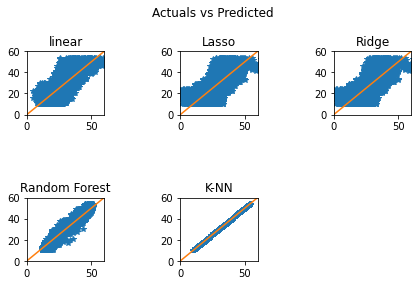

In [60]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)
fig.suptitle('Actuals vs Predicted')
linear = np.linspace(0,60)

ax1.plot(linreg.predict(xtrain), ytrain, '*')
ax1.plot(linear, linear)
ax1.set_title('linear')
ax1.set_xlim(0,60)
ax1.set_ylim(0,60)

ax2.plot(lassocv.predict(xtrain), ytrain, '*')
ax2.plot(linear, linear)
ax2.set_title('Lasso')
ax2.set_xlim(0,60)
ax2.set_ylim(0,60)

ax3.plot(ridgecv.predict(xtrain), ytrain, '*')
ax3.plot(linear, linear)
ax3.set_title('Ridge')
ax3.set_xlim(0,60)
ax3.set_ylim(0,60)

ax4.plot(rf_model.predict(xtrain), ytrain, '*')
ax4.plot(linear, linear)
ax4.set_title('Random Forest')
ax4.set_xlim(0,60)
ax4.set_ylim(0,60)

ax5.plot(knn_grid.predict(xtrain), ytrain, '*')
ax5.plot(linear, linear)
ax5.set_title('K-NN')
ax5.set_xlim(0,60)
ax5.set_ylim(0,60)

ax6.axis('off')

fig.tight_layout(h_pad=5, w_pad=5)